# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
data = data = pd.read_csv("./Data/train_to_download_final_1.csv")

In [3]:
data.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247


# Dealing With Missing Values

In [4]:
data.isnull().sum()

galactic year                                                                   0
galaxy                                                                          0
existence expectancy index                                                      1
existence expectancy at birth                                                   1
Gross income per capita                                                        28
                                                                             ... 
Adjusted net savings                                                         2953
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    2924
Private galaxy capital flows (% of GGP)                                      2991
Gender Inequality Index (GII)                                                3021
y                                                                               0
Length: 80, dtype: int64

## Filling with zeros

In [19]:
data.fillna(0, inplace=True)

## Filling with median

In [ ]:
for col in data.iloc[:, 3:13].columns:
    data[col] = data.groupby("galaxy")[col].apply(lambda x: x.fillna(x.median))

# Transformation

In [5]:
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, PolynomialFeatures

## Categorical Variables

### OneHot Encoding

In [6]:
galaxy_dummies = pd.get_dummies(data.galaxy, drop_first=True, prefix="galaxy")

### Target Encoding 

## Numeric Variables

In [7]:
data.loc[:, "galactic_year"] = pd.Series(np.squeeze(OrdinalEncoder().fit_transform(data["galactic year"].to_frame())))

In [8]:
data.loc[:, "galactic year"] = data.loc[:, "galactic year"] - data.loc[:, "galactic year"].min()

### Interaction Variables

In [9]:
special_11_columns_data = data.iloc[:, range(2,13)]

In [10]:
special_11_columns_data.describe()

,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%)
count,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,2021.000000,2015.000000
mean,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,101.892238,99.936784
std,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,20.319860,32.364952
min,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,33.135967,10.609505
25%,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,89.467683,73.450973
50%,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,108.420709,110.268786
75%,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,116.904405,125.643093
max,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,136.321824,161.270978


In [11]:
special_11_columns_data = special_11_columns_data.mask(special_11_columns_data["Gross income per capita"] < 0, np.nan)

#### Multiplication

In [12]:
interactor = PolynomialFeatures(degree=2, include_bias=True) # interaction_only=False

In [13]:
interactions = interactor.fit_transform(special_11_columns_data.fillna(0))
interactions = pd.DataFrame(interactions, columns=interactor.get_feature_names(special_11_columns_data.columns.tolist()))

In [15]:
# drop the special 11 columns since they are in data 
interactions.drop(special_11_columns_data.columns.tolist(), axis=1, inplace=True)

#### Division

In [17]:
# divide pairs of columns of the special 11
for (column_1, column_2) in combinations(special_11_columns_data.columns.tolist(), 2):
    interactions.loc[:, column_1 + "_div_" + column_2] = data[column_1] / (data[column_2]) 

In [14]:
interactions.head()

,1,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,Education Index^2,"Education Index Intergalactic Development Index (IDI), Rank",Education Index Population using at least basic drinking-water services (%),Education Index Population using at least basic sanitation services (%),"Intergalactic Development Index (IDI), Rank^2","Intergalactic Development Index (IDI), Rank Population using at least basic drinking-water services (%)","Intergalactic Development Index (IDI), Rank Population using at least basic sanitation services (%)",Population using at least basic drinking-water services (%)^2,Population using at least basic drinking-water services (%) Population using at least basic sanitation services (%),Population using at least basic sanitation services (%)^2
0,1.0,0.628657,63.125200,27109.234310,0.646039,8.240543,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1.0,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,...,0.218905,71.361005,0.0,0.0,23263.020905,0.0,0.0,0.0,0.0,0.0
2,1.0,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,...,0.132378,76.337875,0.0,0.0,44021.606749,0.0,0.0,0.0,0.0,0.0
3,1.0,0.555862,52.333293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1.0,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,...,0.843373,66.016136,0.0,0.0,5167.502839,0.0,0.0,0.0,0.0,0.0


#### Concat with data

In [ ]:
# concat data & interactions
data = pd.concat([interactions, data], axis=1)

### MinMax Scaling

In [20]:
scaler = MinMaxScaler()

In [23]:
data_scaled = scaler.fit_transform(data.drop(["galactic_year", "galaxy"], axis=1))

In [24]:
data_columns = data.columns.tolist()
data_columns.remove("galactic_year")
data_columns.remove("galaxy")

In [26]:
data_scaled = pd.DataFrame(data_scaled, columns=data_columns) # data.columns or k

In [27]:
data_scaled["galactic_year"] = data["galactic_year"]

In [28]:
data_scaled.describe()

,1,existence expectancy index^2,existence expectancy index existence expectancy at birth,existence expectancy index Gross income per capita,existence expectancy index Income Index,existence expectancy index Expected years of education (galactic years),existence expectancy index Mean years of education (galactic years),existence expectancy index Intergalactic Development Index (IDI),existence expectancy index Education Index,"existence expectancy index Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI)_div_Intergalactic Development Index (IDI), Rank",Intergalactic Development Index (IDI)_div_Population using at least basic drinking-water services (%),Intergalactic Development Index (IDI)_div_Population using at least basic sanitation services (%),"Education Index_div_Intergalactic Development Index (IDI), Rank",Education Index_div_Population using at least basic drinking-water services (%),Education Index_div_Population using at least basic sanitation services (%),"Intergalactic Development Index (IDI), Rank_div_Population using at least basic drinking-water services (%)","Intergalactic Development Index (IDI), Rank_div_Population using at least basic sanitation services (%)",Population using at least basic drinking-water services (%)_div_Population using at least basic sanitation services (%),galactic_year
count,3865.0,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,...,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000
mean,0.0,0.506302,0.595994,0.176520,0.507276,0.428442,0.401934,0.486432,0.427312,0.446842,...,0.071269,0.267046,0.117173,0.066952,0.272317,0.091100,0.108439,0.049856,0.088463,10.697025
std,0.0,0.173296,0.175324,0.127180,0.193947,0.183385,0.225458,0.245254,0.227687,0.217017,...,0.066660,0.266146,0.127137,0.065654,0.274637,0.099978,0.142715,0.078132,0.096494,6.939479
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.374022,0.464828,0.092800,0.355364,0.298420,0.226959,0.315254,0.261603,0.338662,...,0.031735,0.000000,0.000000,0.027942,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.0,0.529527,0.624751,0.138662,0.506688,0.443193,0.416976,0.529649,0.459506,0.474875,...,0.055152,0.376372,0.150725,0.050919,0.332889,0.108100,0.045505,0.015073,0.115750,10.000000
75%,0.0,0.633825,0.726850,0.214321,0.652391,0.552977,0.573444,0.669927,0.590402,0.601756,...,0.094948,0.515806,0.208190,0.088268,0.531315,0.163126,0.180364,0.067246,0.153354,16.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000


In [29]:
data_scaled = pd.concat([galaxy_dummies, data_scaled], axis=1)

In [31]:
# check that there is no missing values
data_scaled.isnull().sum().sum()  

0

# Feature Selection

## Correlation

### Pairwise

In [ ]:
corrmat = abs(data.corr())
sns.heatmap(corrmat)

### With Target

In [ ]:
data.corrwith()

## Recursive Feature Elimination

# Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, ytrain, ytest = train_test_split(data_scaled.drop('y', axis=1), data.y)

In [34]:
X_train_order = X_train.pop("galactic_year")
X_test_order = X_test.pop("galactic_year")

In [35]:
X_train.shape

(2898, 380)

# Model Fitting

In [123]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from xgboost import XGBRegressor

## ElasticNet

In [99]:
elast = ElasticNet(alpha=0.5, l1_ratio=0.01, fit_intercept=True).fit(X_train, ytrain)

In [100]:
ypred_elast = elast.predict(X_test)

In [101]:
ypred_elast

array([0.06333133, 0.08764943, 0.08134133, 0.10196228, 0.06763049,
       0.08888987, 0.10468491, 0.06384863, 0.09312691, 0.09939439,
       0.0872836 , 0.07250076, 0.08744797, 0.08816322, 0.07171802,
       0.08653488, 0.09703502, 0.10003323, 0.07708881, 0.06752575,
       0.06935185, 0.08071926, 0.08138017, 0.08278413, 0.10229136,
       0.08819084, 0.09621684, 0.07112558, 0.07564226, 0.09735615,
       0.08182475, 0.06285334, 0.08282525, 0.09961669, 0.07557579,
       0.08803358, 0.08932367, 0.09109532, 0.07150191, 0.07331194,
       0.0924541 , 0.07202237, 0.06567096, 0.08764614, 0.08287179,
       0.08989421, 0.06547073, 0.08800167, 0.0837529 , 0.09214648,
       0.08804258, 0.08573746, 0.07693391, 0.06324226, 0.06426467,
       0.08008853, 0.06413746, 0.06908121, 0.09350987, 0.06462582,
       0.09676744, 0.09852168, 0.08080884, 0.07382567, 0.08200334,
       0.08274234, 0.06562094, 0.07119767, 0.08209705, 0.07403885,
       0.08027716, 0.09664391, 0.10227137, 0.08860764, 0.08254

## XGBoost

In [32]:
model = xgb.XGBRegressor(colsample_bytree=0.4,
              gamma=0,                 
              learning_rate=0.01,
              max_depth=3,
              min_child_weight=1.5,
              n_estimators=10000,                                                                    
              reg_alpha=0.75,
              reg_lambda=0.45,
              subsample=0.6,
              seed=42)

In [34]:
model.fit(X_train.values, ytrain)

[00:59:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [91]:
ytrain_pred = model.predict(X_train)

In [35]:
ypred_xgb = model.predict(X_test.values)

## Linear Regression

In [122]:
lr=LinearRegression()
lr.fit(X_train, ytrain)

In [111]:
ypred = lr.predict(X_test)

In [125]:
cross_val_score(LinearRegression(), data_scaled.drop("y", axis=1), data.y, cv=5).mean()

0.9088113920543789

## SVR

In [116]:
vm = SVR().fit(X_train, ytrain)

c:\users\niniolaadegboyega\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [117]:
ypred_svr = vm.predict(X_test)

# Evaluation

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import pylab

In [40]:
def calculate_residuals(ytrue, ypred):
    return ytrue - ypred 

def plot_residuals(ypred, residuals):
    f, axes = plt.subplots(1, 2, figsize=(20, 5))
    sns.scatterplot(x=ypred, y=residuals, ax=axes[0])
    sns.distplot(residuals, ax=axes[1])
    axes[0].set_title("Scatterplot of Residuals")
    axes[1].set_title("Distribution plot of Residuals")
    plt.show()

## RMSE

In [112]:
rmse = mean_squared_error(ytest, ypred) ** 0.5
rmse

0.013399768725360662

In [102]:
rmse_elast = mean_squared_error(ytest, ypred_elast) ** 0.5
rmse_elast

0.054563570213456015

In [118]:
rmse_svr =  mean_squared_error(ytest, ypred_svr) ** 0.5
rmse_svr

0.046470082578497066

## Residuals

In [113]:
residuals = calculate_residuals(ytest, ypred)

In [103]:
residuals_elast = calculate_residuals(ytest, ypred_elast)

In [119]:
residuals_svr = calculate_residuals(ytest, ypred_svr)

### Scatterplot & Distribution Plot

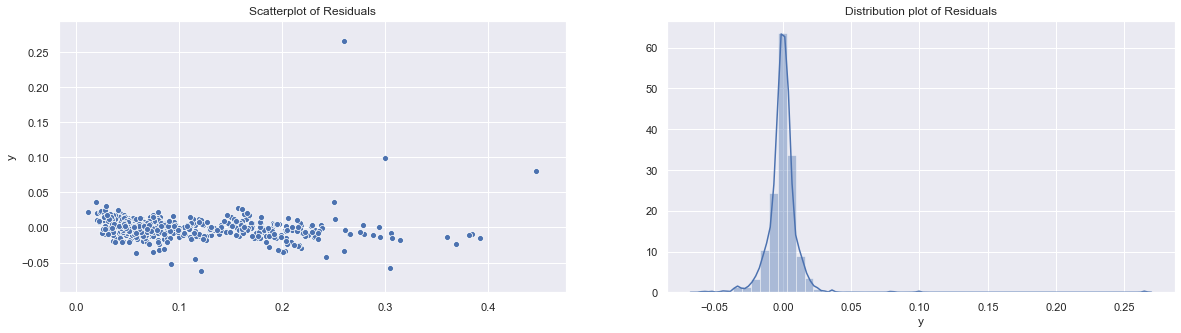

In [114]:
# check for heteroskedasticity
plot_residuals(ypred, residuals)

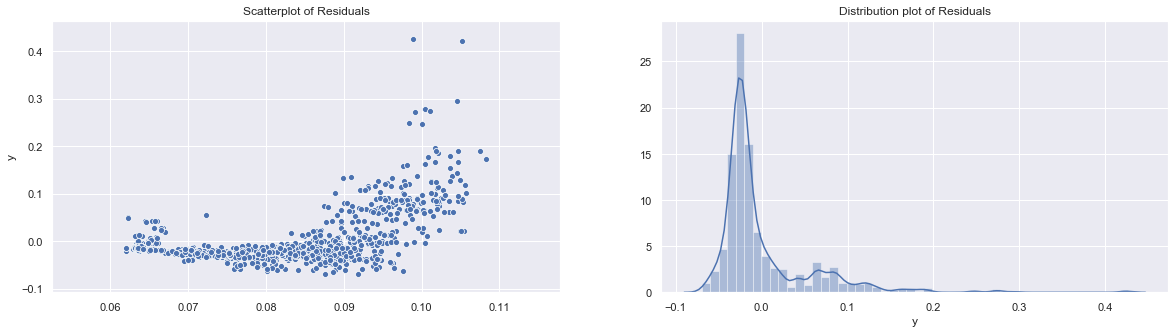

In [106]:
plot_residuals(ypred_elast, residuals_elast)

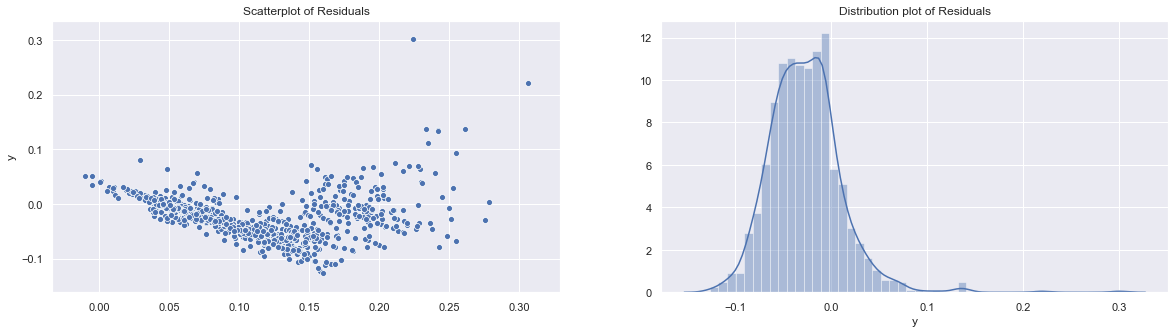

In [120]:
plot_residuals(ypred_svr, residuals_svr)

#### Comments

The aim of this plot to check for Heteroscedasticity and the distribution of residuals. Expected behavior is for residuals to remain evenly distributed about y = 0 as ypred increases. While a normal distribution with mean zero of the residuals is desired, this effect can also be produced in cross-sectional data where a lot of values are very small. 

* XGBRegressor with standard hyperparams, dropped galaxy and galactic year columns produces significant heteroskedasticity. 
* LinearRegression with no tuning, galaxy column one-hot encoded, galactic year dropped, scaled produces little heteroskedasticity. 
* Distribution of Residuals in both cases is normal. 

### Residuals vs. ypred Jointplot 

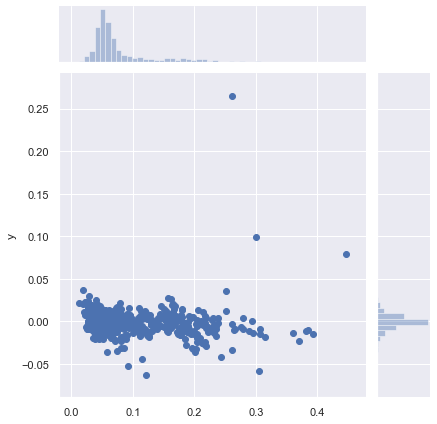

In [44]:
sns.jointplot(x=ypred, y=residuals, kind="scatter")

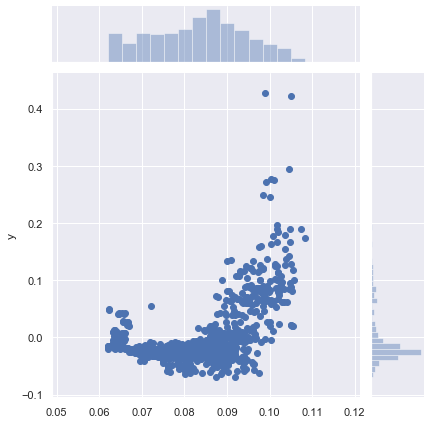

In [107]:
sns.jointplot(x=ypred_elast, y=residuals_elast, kind="scatter")

#### Comments

This plot includes histogram plots of distribution of points on both axes. The y-axis residual plot should be same as Distribution Plot earlier. The x-axis distplot helps give the lie, where necessary, to a misleading normal distribution of residuals.

### Residuals vs. Observation Order Plot

Text(0.5, 1.0, 'Plot of Residuals vs. Order')

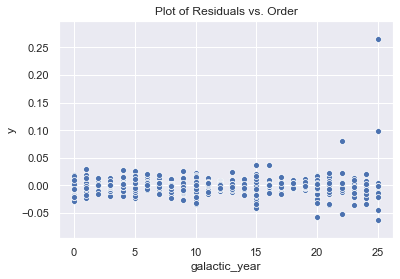

In [45]:
sns.scatterplot(X_test_order, residuals)
plt.title("Plot of Residuals vs. Order")

### Residuals QQ Plot

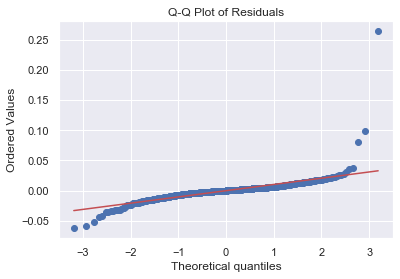

In [46]:
stats.probplot(residuals, dist="norm", plot=pylab)
plt.title("Q-Q Plot of Residuals")
pylab.show()

#### Comments

The Q-Q Plot is a rough indication of the distribution that a set of data comes from. For normal distribution of mean 0 and standard deviation 1, the data should lie on y=x. The residual plot should pass through (0,0) if the mean of the residuals is 0. Slope should be 1 if standard deviation is 1. 

Useful Resources:
 1. [How to interprest a QQ PLot](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot)
 2. [QQ plot and x=y line](https://stats.stackexchange.com/questions/348438/qq-plot-and-x-y-line)

* With Linear Regression, onehot encoding of galaxy column,scaled data, more of the points lie on y=x. The plot has tails showing that it is has more extreme vales than it would if it truly followed a normal distribution. 

## R-Squared

In [47]:
r2_score(ytest, ypred)

0.9516705952083852

In [109]:
r2_score(ytest, ypred_elast)

0.19864970707529617

In [121]:
r2_score(ytest, ypred_svr)

0.41874897780825227

# Model Interpretation

In [ ]:
from collections import OrderedDict

In [ ]:
OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

# Model Tuning

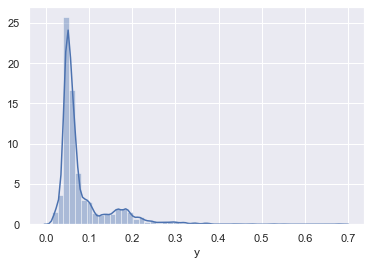

In [52]:
sns.distplot(data.y)

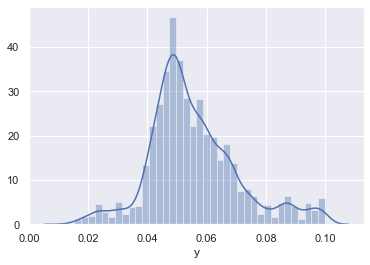

In [49]:
sns.distplot(data.y.loc[data.y < 0.10])

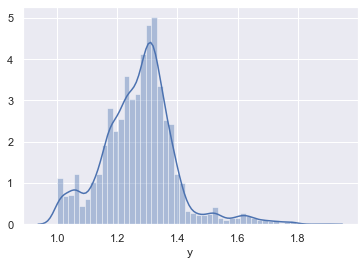

In [50]:
sns.distplot(-np.log10(data.y.loc[data.y < 0.10]))

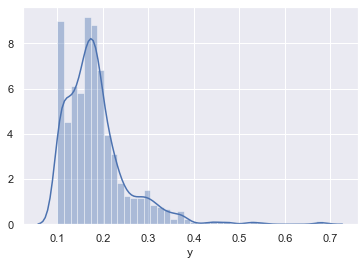

In [51]:
sns.distplot(data.y.loc[data.y > 0.10])

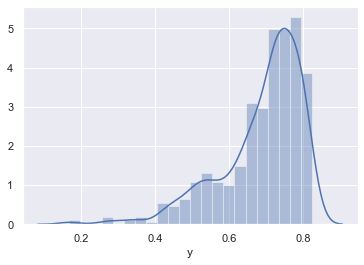

In [48]:
sns.distplot(-np.log10(data.y.loc[data.y > 0.15]))